# Forest Cover Classification

# PROJECT GOAL
<br>

The **Requirement** of a Business Problem **is to develop a predictive model to Analyse and to classify the Coverage type of the forest**  using **Classification Analysis** with **Python**.


# Description

A short description I want to give of how I am going to solve this project before starting. Our goal in this project is to classify which forest type it is from the data given.

This study area includes 4 Wilderness Areas located in the Roosevelt National Forest of Northern Colorado. These area represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological process rather than forest management practices.

 Each observation is 30m x 30m forest cover type determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data. Independent variables were derived from the data originally obtained from US Geological Survey (USGS) and USFS data.

I have been given a total of 54 attributes/features, (excluding 1 target variable) these attributes contain Binary and Quantative attributes, and I need to predict which Forest Cover-Type is it from the given features.

I will first explore the data, visualize it, know what the data wants to tell us. Remove any missing values and features that have null values and scale the data within a specific range.

 Also perform dimensionality reduction procedure where I will use 4 models to tell us which are useful in order to predict the target variable, and then using features which gives us hgih score in the most models. Those 4 Models are:
        Extra Trees Classifier (ETC)
        Random Forest (RF)
        AdaBoost Classifier (ADBC)
        Gradient Boosting Classifier (GBC)

Split the data 75%-25%, train-test set respectively. Will use 10 K-fold Cross Validation on train set.

Feed the training data to the Naive Bayes (Our Benchmark Model) and evaluate the result.

Training will be done on the Solution Models that I have chose, those are:-

        K-Nearest Neighbour (KNN),
        Random Forest (RF),
        Stochastic Gradient Descent Classifier (SGDC),
        Extra Trees Classifier (ETC),
        Logistic Regression (LG)

    Scores will be evaluated with Accuracy and F1 score metrics.

Choosing the best model from above based on metrics scores and testing that model on the test set.


### Explaination of the data

Our dataset has `54` features and `1` target variable `'Cover_Type'`. From `54` features, `10` are `numeric` and `44` are `catrgorical`. From `44` categorical, `40` are of `Soil_Type` and `4` of `Wilderness_Area`.

We have been provided the names of all `Soil_Type` and `Wilderness_Areas` for this dataset. The table below lists all the names with respect to their feature names in the column:

This information is available on [Kaggle](https://www.kaggle.com/uciml/forest-cover-type-dataset), [UCI](https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.info) but for convenience I have documented here too.

<br><br>

| Feature Name | Names |
| ------------ | ----- |
| Wilderness_Area1 | Rawah Wilderness Area |
| Wilderness_Area2 | Neota Wilderness Area |
| Wilderness_Area3 | Comanche Wilderness Area |
| Wilderness_Area4 | Cache La Poudre Wilderness Area |
| Soil_Type1 | Cathedral family - Rock outcrop complex, extremely stony |
| Soil_Type2 | Vanet - Ratake families complex, very stony |
| Soil_Type3 | Haploborolis - Rock outcrop complex, rubbly |
| Soil_Type4 | Ratake family - Rock outcrop complex, rubbly |
| Soil_Type5 | Vanet family - Rock outcrop complex, rubbly |
| Soil_Type6 | Vanet - Wetmore families - Rock outcrop complex, stony |
| Soil_Type7 | Gothic family |
| Soil_Type8 | Supervisor - Limber families complex |
| Soil_Type9 | Troutville family, very stony |
| Soil_Type10 | Bullwark - Catamount families - Rock outcrop complex, rubbly |
| Soil_Type11 | Bullwark - Catamount families - Rock land complex, rubbly |
| Soil_Type12 | Legault family - Rock land complex, stony |
| Soil_Type13 | Catamount family - Rock land - Bullwark family complex, rubbly |
| Soil_Type14 | Pachic Argiborolis - Aquolis complex |
| Soil_Type15 | _unspecified in the USFS Soil and ELU Survey_ |
| Soil_Type16 | Cryaquolis - Cryoborolis complex |
| Soil_Type17 | Gateview family - Cryaquolis complex |
| Soil_Type18 | Rogert family, very stony |
| Soil_Type19 | Typic Cryaquolis - Borohemists complex |
| Soil_Type20 | Typic Cryaquepts - Typic Cryaquolls complex |
| Soil_Type21 | Typic Cryaquolls - Leighcan family, till substratum complex |
| Soil_Type22 | Leighcan family, till substratum, extremely bouldery |
| Soil_Type23 | Leighcan family, till substratum, - Typic Cryaquolls complex. |
| Soil_Type24 | Leighcan family, extremely stony |
| Soil_Type25 | Leighcan family, warm, extremely stony |
| Soil_Type26 | Granile - Catamount families complex, very stony |
| Soil_Type27 | Leighcan family, warm - Rock outcrop complex, extremely stony |
| Soil_Type28 | Leighcan family - Rock outcrop complex, extremely stony |
| Soil_Type29 | Como - Legault families complex, extremely stony |
| Soil_Type30 | Como family - Rock land - Legault family complex, extremely stony |
| Soil_Type31 | Leighcan - Catamount families complex, extremely stony |
| Soil_Type32 | Catamount family - Rock outcrop - Leighcan family complex, extremely stony |
| Soil_Type33 | Leighcan - Catamount families - Rock outcrop complex, extremely stony |
| Soil_Type34 | Cryorthents - Rock land complex, extremely stony |
| Soil_Type35 | Cryumbrepts - Rock outcrop - Cryaquepts complex |
| Soil_Type36 | Bross family - Rock land - Cryumbrepts complex, extremely stony |
| Soil_Type37 | Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony |
| Soil_Type38 | Leighcan - Moran families - Cryaquolls complex, extremely stony |
| Soil_Type39 | Moran family - Cryorthents - Leighcan family complex, extremely stony |
| Soil_Type40 | Moran family - Cryorthents - Rock land complex, extremely stony |
| Cover_Type | Target Variable - It contain mixture of all Families and yet to be Classified |


# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings("ignore")

# Data Loader

In [2]:
path ="D:\Data Science Python Programs\FOREST COVER CLASSIFCATION\kaggle_train.csv"
path1 ="D:\Data Science Python Programs\FOREST COVER CLASSIFCATION\kaggle_test.csv"
class DataFrame_Loader():

    
    def __init__(self):
        
        print("Loadind DataFrame")
        
    def read_csv(self,data):
        self.df = pd.read_csv(data)
        
    def load_csv(self):
        return self.df

In [6]:
load= DataFrame_Loader()

Loadind DataFrame


In [7]:
load.read_csv(path)

In [5]:
dftrain = load.load_csv()
dftrain.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [8]:
dftest = load.load_csv()
dftest.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0


# Exploratory Data Analysis

In [9]:
class DataFrame_Information():
    

    def __init__(self):
        
        print("Attribute Information object created")
        
        
        
    def Attribute_information(self,df):
        
        """
        This method will give us a basic
        information of the dataframe like
        Count of Attributes,Count of rows,
        Numerical Attributes, Categorical 
        Attributes, Factor Attributes etc..
        """
    
        data_info = pd.DataFrame(
                                columns=['No of observation',
                                        'No of Variables',
                                        'No of Numerical Variables',
                                        'No of Factor Variables',
                                        'No of Categorical Variables',
                                        'No of Logical Variables',
                                        'No of Date Variables',
                                        'No of zero variance variables'])


        data_info.loc[0,'No of observation'] = df.shape[0]
        data_info.loc[0,'No of Variables'] = df.shape[1]
        data_info.loc[0,'No of Numerical Variables'] = df._get_numeric_data().shape[1]
        data_info.loc[0,'No of Factor Variables'] = df.select_dtypes(include='category').shape[1]
        data_info.loc[0,'No of Logical Variables'] = df.select_dtypes(include='bool').shape[1]
        data_info.loc[0,'No of Categorical Variables'] = df.select_dtypes(include='object').shape[1]
        data_info.loc[0,'No of Date Variables'] = df.select_dtypes(include='datetime64').shape[1]
        data_info.loc[0,'No of zero variance variables'] = df.loc[:,df.apply(pd.Series.nunique)==1].shape[1]

        data_info =data_info.transpose()
        data_info.columns=['value']
        data_info['value'] = data_info['value'].astype(int)


        return data_info

    def __get_missing_values(self,data):
        
        """
        It is a Private method, so it cannot 
        be accessed by object outside the 
        class. This function will give us 
        a basic information like count 
        of missing values
        """
        
        #Getting sum of missing values for each feature
        missing_values = data.isnull().sum()
        #Feature missing values are sorted from few to many
        missing_values.sort_values(ascending=False, inplace=True)
        
        #Returning missing values
        return missing_values
        
    def Agg_Tabulation(self,data):
        
        
        """
        This method is a extension of 
        schema will gives the aditional 
        information about the data
        like Entropy value, Missing 
        Value Percentage and some observations
        """
        
        print("=" * 110)
        print("Aggregation of Table")
        print("=" * 110)
        table = pd.DataFrame(data.dtypes,columns=['dtypes'])
        table1 =pd.DataFrame(data.columns,columns=['Names'])
        table = table.reset_index()
        table= table.rename(columns={'index':'Name'})
        table['No of Missing'] = data.isnull().sum().values    
        table['No of Uniques'] = data.nunique().values
        table['Percent of Missing'] = ((data.isnull().sum().values)/ (data.shape[0])) *100
        table['First Observation'] = data.loc[0].values
        table['Second Observation'] = data.loc[1].values
        table['Third Observation'] = data.loc[2].values
        for name in table['Name'].value_counts().index:
            table.loc[table['Name'] == name, 'Entropy'] = round(stats.entropy(data[name].value_counts(normalize=True), base=2),2)
        return table
    
        print("=" * 110)
        
    def __iqr(self,x):
        
        
        """
        It is a private method which 
        returns you interquartile Range
        """
        return x.quantile(q=0.75) - x.quantile(q=0.25)

    def __outlier_count(self,x):
        
        
        """
        It is a private method which 
        returns you outlier present
        in the interquartile Range
        """
        upper_out = x.quantile(q=0.75) + 1.5 * self.__iqr(x)
        lower_out = x.quantile(q=0.25) - 1.5 * self.__iqr(x)
        return len(x[x > upper_out]) + len(x[x < lower_out])

    def num_count_summary(self,df):
        
        
        """
        This method will returns 
        you the information about
        numerical attributes like
        Positive values,Negative Values
        Unique count, Zero count 
        positive and negative inf-
        nity count and count of outliers
        etc 
        
        """
        
        df_num = df._get_numeric_data()
        data_info_num = pd.DataFrame()
        i=0
        for c in  df_num.columns:
            data_info_num.loc[c,'Negative values count']= df_num[df_num[c]<0].shape[0]
            data_info_num.loc[c,'Positive values count']= df_num[df_num[c]>0].shape[0]
            data_info_num.loc[c,'Zero count']= df_num[df_num[c]==0].shape[0]
            data_info_num.loc[c,'Unique count']= len(df_num[c].unique())
            data_info_num.loc[c,'Negative Infinity count']= df_num[df_num[c]== -np.inf].shape[0]
            data_info_num.loc[c,'Positive Infinity count']= df_num[df_num[c]== np.inf].shape[0]
            data_info_num.loc[c,'Missing Percentage']= df_num[df_num[c].isnull()].shape[0]/ df_num.shape[0]
            data_info_num.loc[c,'Count of outliers']= self.__outlier_count(df_num[c])
            i = i+1
        return data_info_num
    
    def statistical_summary(self,df):
        
        
        """
        This method will returns 
        you the varoius percentile
        of the data including count 
        and mean
        """
    
        df_num = df._get_numeric_data()

        data_stat_num = pd.DataFrame()

        try:
            data_stat_num = pd.concat([df_num.describe().transpose(),
                                       pd.DataFrame(df_num.quantile(q=0.10)),
                                       pd.DataFrame(df_num.quantile(q=0.90)),
                                       pd.DataFrame(df_num.quantile(q=0.95))],axis=1)
            data_stat_num.columns = ['count','mean','std','min','25%','50%','75%','max','10%','90%','95%']
        except:
            pass

        return data_stat_num

In [10]:
info = DataFrame_Information()

Attribute Information object created


In [11]:
info.Attribute_information(dftrain)

,value
No of observation,15120
No of Variables,56
No of Numerical Variables,56
No of Factor Variables,0
No of Categorical Variables,0
No of Logical Variables,0
No of Date Variables,0
No of zero variance variables,2


In [12]:
info.Agg_Tabulation(dftrain)

Aggregation of Table


,Name,dtypes,No of Missing,No of Uniques,Percent of Missing,First Observation,Second Observation,Third Observation,Entropy
0,Id,int64,0,15120,0.0,1,2,3,13.88
1,Elevation,int64,0,1665,0.0,2596,2590,2804,10.47
2,Aspect,int64,0,361,0.0,51,56,139,8.34
3,Slope,int64,0,52,0.0,3,2,9,5.04
4,Horizontal_Distance_To_Hydrology,int64,0,400,0.0,258,212,268,6.44
5,Vertical_Distance_To_Hydrology,int64,0,423,0.0,0,-6,65,7.23
6,Horizontal_Distance_To_Roadways,int64,0,3250,0.0,510,390,3180,10.84
7,Hillshade_9am,int64,0,176,0.0,221,220,234,6.72
8,Hillshade_Noon,int64,0,141,0.0,232,235,238,6.38
9,Hillshade_3pm,int64,0,247,0.0,148,151,135,7.50


In [13]:
info.num_count_summary(dftrain)

,Negative values count,Positive values count,Zero count,Unique count,Negative Infinity count,Positive Infinity count,Missing Percentage,Count of outliers
Id,0.0,15120.0,0.0,15120.0,0.0,0.0,0.0,0.0
Elevation,0.0,15120.0,0.0,1665.0,0.0,0.0,0.0,0.0
Aspect,0.0,15010.0,110.0,361.0,0.0,0.0,0.0,0.0
Slope,0.0,15115.0,5.0,52.0,0.0,0.0,0.0,57.0
Horizontal_Distance_To_Hydrology,0.0,13530.0,1590.0,400.0,0.0,0.0,0.0,512.0
Vertical_Distance_To_Hydrology,1139.0,12091.0,1890.0,423.0,0.0,0.0,0.0,586.0
Horizontal_Distance_To_Roadways,0.0,15117.0,3.0,3250.0,0.0,0.0,0.0,830.0
Hillshade_9am,0.0,15119.0,1.0,176.0,0.0,0.0,0.0,408.0
Hillshade_Noon,0.0,15120.0,0.0,141.0,0.0,0.0,0.0,393.0
Hillshade_3pm,0.0,15032.0,88.0,247.0,0.0,0.0,0.0,124.0


In [14]:
info.statistical_summary(dftrain)

,count,mean,std,min,25%,50%,75%,max,10%,90%,95%
Id,15120.0,7560.500000,4364.912370,1.0,3780.75,7560.5,11340.25,15120.0,1512.9,13608.1,14364.05
Elevation,15120.0,2749.322553,417.678187,1863.0,2376.00,2752.0,3104.00,3849.0,2199.9,3334.0,3397.00
Aspect,15120.0,156.676653,110.085801,0.0,65.00,126.0,261.00,360.0,28.0,329.0,344.00
Slope,15120.0,16.501587,8.453927,0.0,10.00,15.0,22.00,52.0,6.0,29.0,32.00
Horizontal_Distance_To_Hydrology,15120.0,227.195701,210.075296,0.0,67.00,180.0,330.00,1343.0,0.0,499.0,631.00
Vertical_Distance_To_Hydrology,15120.0,51.076521,61.239406,-146.0,5.00,32.0,79.00,554.0,0.0,135.0,176.00
Horizontal_Distance_To_Roadways,15120.0,1714.023214,1325.066358,0.0,764.00,1316.0,2270.00,6890.0,390.0,3778.3,4635.10
Hillshade_9am,15120.0,212.704299,30.561287,0.0,196.00,220.0,235.00,254.0,170.0,246.0,250.00
Hillshade_Noon,15120.0,218.965608,22.801966,99.0,207.00,223.0,235.00,254.0,187.0,246.0,250.00
Hillshade_3pm,15120.0,135.091997,45.895189,0.0,106.00,138.0,167.00,248.0,73.0,193.0,207.00


# Data Preprocessing

In [12]:
class DataFrame_Preprocessor():
    

    def __init__(self):
        print("Preprocessor object created")
        
        
    def __split_numbers_chars(self,row):
        head = row.rstrip('0123456789')
        tail = row[len(head):]
        return head, tail
    
    def reverse_one_hot_encode(self,dataframe, start_loc, end_loc, numeric_column_name):
        dataframe['String_Column'] = (dataframe.iloc[:, start_loc:end_loc] == 1).idxmax(1)
        dataframe['Tuple_Column'] = dataframe['String_Column'].apply(self.__split_numbers_chars)
        dataframe[numeric_column_name] = pd.to_numeric(dataframe['Tuple_Column'].apply(lambda x: x[1]),errors='coerce')
        dataframe.drop(columns=['String_Column','Tuple_Column'], inplace=True)


In [13]:
Preprocessor = DataFrame_Preprocessor()

Preprocessor object created


In [14]:
Preprocessor.reverse_one_hot_encode(dftrain,14,54,'soil_type')
Preprocessor.reverse_one_hot_encode(dftrain,10,14,'wilderness')
dftrain.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,soil_type,wilderness
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,5,29,1.0
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,5,29,1.0
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,2,12,1.0
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,2,30,1.0
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,5,29,1.0


In [15]:
Preprocessor.reverse_one_hot_encode(dftest,14,54,'soil_type')
Preprocessor.reverse_one_hot_encode(dftest,10,14,'wilderness')
dftest.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,soil_type,wilderness
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,29,1.0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,29,1.0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,29,1.0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,29,1.0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,29,1.0


In [25]:
col_list = ['Soil_Type1','Soil_Type2','Soil_Type3','Soil_Type4','Soil_Type5','Soil_Type6','Soil_Type7','Soil_Type8','Soil_Type9','Soil_Type10',
  'Soil_Type11','Soil_Type12','Soil_Type13','Soil_Type14','Soil_Type15','Soil_Type16','Soil_Type17','Soil_Type18','Soil_Type19',
  'Soil_Type20','Soil_Type21','Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25','Soil_Type26','Soil_Type27','Soil_Type28',
  'Soil_Type29','Soil_Type30','Soil_Type31','Soil_Type32','Soil_Type33','Soil_Type34','Soil_Type35','Soil_Type36','Soil_Type37',
  'Soil_Type38','Soil_Type39','Soil_Type40']

col_list1 = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3','Wilderness_Area4']

class Column_Dopper():

    
    def __init__(self):
        print("Column Dopper object created")
    
    
    def dropper(self,x):
        
        """
        This method helps
        to drop the columns
        in our original 
        dataframe which is 
        available in the 
        col_list and return 
        us final dataset
        """
        
        data=[]
        for i in x.columns:
            if i not in col_list:
                data.append(i)
        return x[data]


In [26]:
col_drop = Column_Dopper()

Column Dopper object created


In [21]:
dftrain = col_drop.dropper(dftrain)
dftrain.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,soil_type,wilderness
0,1,2596,51,3,258,0,510,221,232,148,6279,5,29,1.0
1,2,2590,56,2,212,-6,390,220,235,151,6225,5,29,1.0
2,3,2804,139,9,268,65,3180,234,238,135,6121,2,12,1.0
3,4,2785,155,18,242,118,3090,238,238,122,6211,2,30,1.0
4,5,2595,45,2,153,-1,391,220,234,150,6172,5,29,1.0


In [27]:
dftest = col_drop.dropper(dftest)
dftest.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,soil_type,wilderness
0,15121,2680,354,14,0,0,2684,196,214,156,6645,29,1.0
1,15122,2683,0,13,0,0,2654,201,216,152,6675,29,1.0
2,15123,2713,16,15,0,0,2980,206,208,137,6344,29,1.0
3,15124,2709,24,17,0,0,2950,208,201,125,6374,29,1.0
4,15125,2706,29,19,0,0,2920,210,195,115,6404,29,1.0


# Feature Engineering 

In [28]:
class DataFrame_Feature_Engineering():

    def __init__(self):
        print("Feature Engineering object created")
        
    def Make_Features_for_Train(self,dftrain):
        
        dftrain['Hydro_fire'] = dftrain['Horizontal_Distance_To_Fire_Points'] +  dftrain['Horizontal_Distance_To_Hydrology']
        dftrain['Hydro_Road'] = dftrain['Horizontal_Distance_To_Roadways'] +  dftrain['Horizontal_Distance_To_Hydrology']
        dftrain['Road_fire'] = dftrain['Horizontal_Distance_To_Fire_Points'] +  dftrain['Horizontal_Distance_To_Roadways']
        dftrain['Hydro_Road_sub'] = np.abs(dftrain['Horizontal_Distance_To_Roadways'] -  dftrain['Horizontal_Distance_To_Hydrology'])
        dftrain['Hydro_fire_sub'] = np.abs(dftrain['Horizontal_Distance_To_Fire_Points'] -  dftrain['Horizontal_Distance_To_Hydrology'])
        dftrain['Road_fire_sub'] = np.abs(dftrain['Horizontal_Distance_To_Fire_Points'] -  dftrain['Horizontal_Distance_To_Roadways'])
        dftrain['RAD_SLOPE'] = dftrain['Slope'].apply(lambda x: x*(np.pi/180))
        dftrain['RAD_Aspect'] = dftrain['Aspect'].apply(lambda x: x*(np.pi/180))
        dftrain['EL_DIS'] = dftrain['Elevation'] - dftrain['Horizontal_Distance_To_Hydrology']*0.2
        dftrain['EL_Fire'] = dftrain['Elevation'] - dftrain['Horizontal_Distance_To_Fire_Points']*0.2
        dftrain['EL_Road'] = dftrain['Elevation'] - dftrain['Horizontal_Distance_To_Roadways']*0.2
        
        
    def Make_Features_for_Test(self,dftest):
        
        dftest['Hydro_fire'] = dftest['Horizontal_Distance_To_Fire_Points'] +  dftest['Horizontal_Distance_To_Hydrology']
        dftest['Hydro_Road'] = dftest['Horizontal_Distance_To_Roadways'] +  dftest['Horizontal_Distance_To_Hydrology']
        dftest['Road_fire'] = dftest['Horizontal_Distance_To_Fire_Points'] +  dftest['Horizontal_Distance_To_Roadways']
        dftest['Hydro_fire_sub'] = np.abs(dftest['Horizontal_Distance_To_Fire_Points'] -  dftest['Horizontal_Distance_To_Hydrology'])
        dftest['Hydro_Road_sub'] = np.abs(dftest['Horizontal_Distance_To_Roadways'] -  dftest['Horizontal_Distance_To_Hydrology'])
        dftest['Road_fire_sub'] = np.abs(dftest['Horizontal_Distance_To_Fire_Points'] -  dftest['Horizontal_Distance_To_Roadways'])
        dftest['RAD_SLOPE'] = dftest['Slope'].apply(lambda x: x*(np.pi/180))
        dftest['RAD_Aspect'] = dftest['Aspect'].apply(lambda x: x*(np.pi/180))
        dftest['EL_DIS'] = dftest['Elevation'] - dftest['Horizontal_Distance_To_Hydrology']*0.2
        dftest['EL_Fire'] = dftest['Elevation'] - dftest['Horizontal_Distance_To_Fire_Points']*0.2
        dftest['EL_Road'] = dftest['Elevation'] - dftest['Horizontal_Distance_To_Roadways']*0.2



In [29]:
FE = DataFrame_Feature_Engineering()

Feature Engineering object created


In [30]:
FE.Make_Features_for_Train(dftrain)
dftrain.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Hydro_Road,Road_fire,Hydro_Road_sub,Hydro_fire_sub,Road_fire_sub,RAD_SLOPE,RAD_Aspect,EL_DIS,EL_Fire,EL_Road
0,1,2596,51,3,258,0,510,221,232,148,...,768,6789,252,6021,5769,0.052360,0.890118,2544.4,1340.2,2494.0
1,2,2590,56,2,212,-6,390,220,235,151,...,602,6615,178,6013,5835,0.034907,0.977384,2547.6,1345.0,2512.0
2,3,2804,139,9,268,65,3180,234,238,135,...,3448,9301,2912,5853,2941,0.157080,2.426008,2750.4,1579.8,2168.0
3,4,2785,155,18,242,118,3090,238,238,122,...,3332,9301,2848,5969,3121,0.314159,2.705260,2736.6,1542.8,2167.0
4,5,2595,45,2,153,-1,391,220,234,150,...,544,6563,238,6019,5781,0.034907,0.785398,2564.4,1360.6,2516.8


In [31]:
FE.Make_Features_for_Test(dftest)
dftest.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Hydro_Road,Road_fire,Hydro_fire_sub,Hydro_Road_sub,Road_fire_sub,RAD_SLOPE,RAD_Aspect,EL_DIS,EL_Fire,EL_Road
0,15121,2680,354,14,0,0,2684,196,214,156,...,2684,9329,6645,2684,3961,0.244346,6.178466,2680.0,1351.0,2143.2
1,15122,2683,0,13,0,0,2654,201,216,152,...,2654,9329,6675,2654,4021,0.226893,0.000000,2683.0,1348.0,2152.2
2,15123,2713,16,15,0,0,2980,206,208,137,...,2980,9324,6344,2980,3364,0.261799,0.279253,2713.0,1444.2,2117.0
3,15124,2709,24,17,0,0,2950,208,201,125,...,2950,9324,6374,2950,3424,0.296706,0.418879,2709.0,1434.2,2119.0
4,15125,2706,29,19,0,0,2920,210,195,115,...,2920,9324,6404,2920,3484,0.331613,0.506145,2706.0,1425.2,2122.0


# Missing Value Imputation

In [32]:
class DataFrame_numerical_Imputer():
    

    def __init__(self):
        print("numerical_Imputer object created")

        
   
    def KNN_Imputer(self,df):
        
        """
        This method is for
        imputation, behalf
        of all methods KNN
        imputation performs
        well, hence this method
        will helps to impute
        missing values in 
        dataset
        """
        
        knn_imputer = KNNImputer(n_neighbors=5)
        df.iloc[:, :] = knn_imputer.fit_transform(df)
        return df

In [33]:
imputer = DataFrame_numerical_Imputer()

numerical_Imputer object created


In [34]:
dftrain = imputer.KNN_Imputer(dftrain)
dftrain.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Hydro_Road,Road_fire,Hydro_Road_sub,Hydro_fire_sub,Road_fire_sub,RAD_SLOPE,RAD_Aspect,EL_DIS,EL_Fire,EL_Road
0,1.0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,...,768.0,6789.0,252.0,6021.0,5769.0,0.052360,0.890118,2544.4,1340.2,2494.0
1,2.0,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,...,602.0,6615.0,178.0,6013.0,5835.0,0.034907,0.977384,2547.6,1345.0,2512.0
2,3.0,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,...,3448.0,9301.0,2912.0,5853.0,2941.0,0.157080,2.426008,2750.4,1579.8,2168.0
3,4.0,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,...,3332.0,9301.0,2848.0,5969.0,3121.0,0.314159,2.705260,2736.6,1542.8,2167.0
4,5.0,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,...,544.0,6563.0,238.0,6019.0,5781.0,0.034907,0.785398,2564.4,1360.6,2516.8


In [35]:
dftrain =  dftrain.drop(['Id'],axis=1)
dftrain.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Hydro_Road,Road_fire,Hydro_Road_sub,Hydro_fire_sub,Road_fire_sub,RAD_SLOPE,RAD_Aspect,EL_DIS,EL_Fire,EL_Road
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,768.0,6789.0,252.0,6021.0,5769.0,0.052360,0.890118,2544.4,1340.2,2494.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,602.0,6615.0,178.0,6013.0,5835.0,0.034907,0.977384,2547.6,1345.0,2512.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,3448.0,9301.0,2912.0,5853.0,2941.0,0.157080,2.426008,2750.4,1579.8,2168.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,3332.0,9301.0,2848.0,5969.0,3121.0,0.314159,2.705260,2736.6,1542.8,2167.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,544.0,6563.0,238.0,6019.0,5781.0,0.034907,0.785398,2564.4,1360.6,2516.8


# Model Selection

In [37]:
from sklearn.model_selection import KFold, cross_val_score,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x = dftrain.drop(['Cover_Type'],axis=1)
y = dftrain['Cover_Type']
x_train,x_test,y_train,y_test=train_test_split(x\
                ,y,test_size=0.30,random_state=42)

class Model_Selector():
    
    

    def __init__(self):
        print("Model Selector object created")
        
    """
    This method helps to select
    the best machine learning 
    model to compute the relationship
    betweem i/p and d/p variable
    
    """    
        
        
    def Classification_Model_Selector(self,df):
        seed = 42
        models = []
        models.append(("LR", LogisticRegression()))
        models.append(("RF", RandomForestClassifier(n_estimators=100,\
            random_state=42,max_depth=10)))
        models.append(("KNN", KNeighborsClassifier()))
        models.append(("CART", DecisionTreeClassifier()))
        models.append(("XGB", XGBClassifier()))
        result = []
        names = []
        scoring = 'accuracy'
        seed = 42
        
        

        for name, model in models:
            kfold = KFold(n_splits = 5, random_state =seed)
            cv_results = cross_val_score(model, x_train,\
                    y_train, cv = kfold, scoring = scoring)
            result.append(cv_results)
            names.append(name)
            msg = (name, cv_results.mean(), cv_results.std())
            print(msg)
            
            
            
        fig = plt.figure(figsize = (8,4))
        fig.suptitle('Algorithm Comparison')
        ax = fig.add_subplot(1,1,1)
        plt.boxplot(result)
        ax.set_xticklabels(names)
        plt.show()

In [38]:
MS = Model_Selector()

Model Selector object created


('LR', 0.4263968521992726, 0.020652454887971447)
('RF', 0.8216173330845, 0.01137376811096695)
('KNN', 0.7602031176192725, 0.014050741528339293)
('CART', 0.7704076192993436, 0.01718491696928824)
('XGB', 0.8591267647891361, 0.010011922709459635)


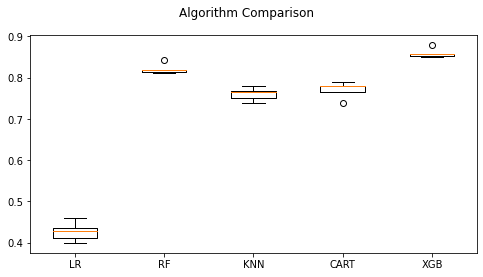

In [39]:
MS.Classification_Model_Selector(dftrain)

# Data Modelling

In [42]:
class Data_Modelling():
    

    def __init__(self,n_estimators,
                    max_depth,
                    min_samples_split,
                    min_samples_leaf,
                    max_leaf_nodes,
                    bootstrap,
                    class_weight,
                    min_child_weight,
                    learning_rate,
                    Subsample,
                    Alpha,
                    Lamda,
                    random_state,
                    criterion):
        
        self.n_estimators = 500
        self.max_depth = 5
        self.min_samples_split = 3
        self.min_samples_leaf = 3
        self.max_leaf_nodes = None
        self.bootstrap = True
        self.class_weight = 'balanced'
        self.min_child_weight = 3
        self.learning_rate = 0.07
        self.Subsample = 0.7
        self.Alpha = 0
        self.Lamda = 1.5
        self.random_state = 29 
        self.criterion = 'entropy'
        
        print("Data Modelling object created")
        
        
    def Random_Forest_Model(self,df):
        
        Classifier = RandomForestClassifier(n_estimators = self.n_estimators,
                    max_depth = self.max_depth,
                    min_samples_split = self.min_samples_split,
                    min_samples_leaf = self.min_samples_leaf,
                    max_leaf_nodes = self.max_leaf_nodes,
                    bootstrap = self.bootstrap,
                    class_weight= self.class_weight,
                    criterion = self.criterion)
        
        Classifier.fit(x_train,y_train)
        
        RF_pred=Classifier.predict(x_test)
        
        print(metrics.accuracy_score(y_test, RF_pred))
        
        print(metrics.confusion_matrix(y_test, RF_pred))
        
        print(metrics.classification_report(y_test, RF_pred))
        
    def Extreme_Gradient_Boosting_Model(self,df):
        
        XGB_Classifier = XGBClassifier(n_estimators = self.n_estimators,
                    learning_rate = self.learning_rate,
                    max_depth = self.max_depth,
                    min_child_weight = self.min_child_weight,
                    random_state = self.random_state,
                    Subsample = self.Subsample,
                    Alpha = self.Alpha,
                    Lamda = self.Lamda)
        
        XGB_Classifier.fit(x_train,y_train)
        
        XGB_pred=XGB_Classifier.predict(x_test)
        
        print(metrics.accuracy_score(y_test, XGB_pred))
        
        print(metrics.confusion_matrix(y_test, XGB_pred))
        
        print(metrics.classification_report(y_test, XGB_pred))

In [43]:
Basemodel = Data_Modelling(500,5,3,3,None,True,'balanced',3,0.07,0.7,0,1.5,29,'entropy')

Data Modelling object created


In [44]:
Basemodel.Random_Forest_Model(dftrain)

0.7028218694885362
[[390  75   2   0  53   1  99]
 [196 238   9   0 176  27  12]
 [  0   0 399 149  17  80   0]
 [  0   0  18 636   0   7   0]
 [  1  38  21   0 571  19   0]
 [  0   0 183  93  45 329   0]
 [ 25   0   0   0   2   0 625]]
              precision    recall  f1-score   support

         1.0       0.64      0.63      0.63       620
         2.0       0.68      0.36      0.47       658
         3.0       0.63      0.62      0.62       645
         4.0       0.72      0.96      0.83       661
         5.0       0.66      0.88      0.75       650
         6.0       0.71      0.51      0.59       650
         7.0       0.85      0.96      0.90       652

    accuracy                           0.70      4536
   macro avg       0.70      0.70      0.69      4536
weighted avg       0.70      0.70      0.69      4536



In [45]:
Basemodel.Extreme_Gradient_Boosting_Model(dftrain)

[01:04:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { Alpha, Lamda, Subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.8666225749559083
[[474 101   1   0  13   1  30]
 [114 452  23   0  52  13   4]
 [  0   1 551  22   3  68   0]
 [  0   0  16 638   0   7   0]
 [  3  15  15   0 615   2   0]
 [  0  10  48  19   6 567   0]
 [ 18   0   0   0   0   0 634]]
              precision    recall  f1-score   support

         1.0       0.78      0.76      0.77       620
         2.0       0.78      0.69      0.73       658
         3.0       0.84      0.85      0.85       645
         4.0       0.94      0.97      0.95       661
         5.0       0.89      0.95      0.92       650
         6.0       0.86      0.87    

# Data Modelling

## HyperParameter Tuning

In [102]:
class Model_Classifier_HyperParameter_Tuning():
    

    def __init__(self):
        
        print("HyperParameter_Tuning object created")
        
    class XGB_Classifier_HyperParameter_Tuning():
    

        def __init__(self):

            print("XGB HyperParameter_Tuning object created")


        def Fit_XGB_HyperParameter_Tuner(self,dftrain):
            

            xgb_clf = XGBClassifier(tree_method = "exact", predictor = "cpu_predictor",
                                        objective = "multi:softmax")


            parameters = {"learning_rate": [0.1, 0.01, 0.001],
                           "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
                           "max_depth": [2, 4, 7, 10],
                           "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
                           "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
                           "reg_alpha": [0, 0.5, 1],
                           "reg_lambda": [1, 1.5, 2, 3, 4.5],
                           "min_child_weight": [1, 3, 5, 7],
                           "n_estimators": [100, 250, 500, 1000]}

            from sklearn.model_selection import RandomizedSearchCV

            xgb_rscv = RandomizedSearchCV(xgb_clf, param_distributions = parameters, scoring = "f1_micro",
                                         cv = 3, random_state = 29 )

            # Fit the model
            model_xgboost = xgb_rscv.fit(x_train, y_train)
            return model_xgboost
        
        
        def XGB_Get_Best_Prams(self):
            
            print("Learning Rate: ", Xgb_model.best_estimator_.get_params()["learning_rate"])
            print("Gamma: ", Xgb_model.best_estimator_.get_params()["gamma"])
            print("Max Depth: ", Xgb_model.best_estimator_.get_params()["max_depth"])
            print("Subsample: ", Xgb_model.best_estimator_.get_params()["subsample"])
            print("Max Features at Split: ", Xgb_model.best_estimator_.get_params()["colsample_bytree"])
            print("Alpha: ", Xgb_model.best_estimator_.get_params()["reg_alpha"])
            print("Lamda: ", Xgb_model.best_estimator_.get_params()["reg_lambda"])
            print("Minimum Sum of the Instance Weight Hessian to Make a Child: ",Xgb_model.best_estimator_.get_params()["min_child_weight"])
            print("Number of Trees: ", Xgb_model.best_estimator_.get_params()["n_estimators"])


        
        def get_classification_report(self,modelname,y_test):
            
            
            
            ypred = modelname.predict(x_test)
            report = metrics.classification_report(y_test, ypred,output_dict=True)
            print(metrics.confusion_matrix(y_test, ypred))
            print(metrics.accuracy_score(y_test, ypred))
            df_classification_report = pd.DataFrame(report).transpose()
            return df_classification_report
        
        class RF_Classifier_HyperParameter_Tuning():
    

            def __init__(self):

                print("RF HyperParameter_Tuning object created")


            def Fit_RF_HyperParameter_Tuner(self,dftrain):
                
                

                param_grid = {"max_depth": [1, 3, 5, 7, 9, 10],
                              "max_features": [1, 3, 10, 20,40, 50,80],
                              "min_samples_split": [1, 3, 10, 15, 20],
                              "min_samples_leaf": [1, 3, 5, 10],
                              "bootstrap": [True, False],
                              "criterion": ["gini", "entropy"],
                              "n_estimators": [100, 250, 500, 1000]}

                clf = RandomForestClassifier(random_state=29, class_weight='balanced', n_jobs=-1)
                model = RandomizedSearchCV(clf, param_grid, scoring = 'f1_micro', cv=10)

                model.fit(x_train, y_train)

                return model

            def RF_Get_Best_Prams(self):
                
                
                

                print("n_estimators: ", RF_model.best_estimator_.get_params()["n_estimators"])
                print("Max Depth: ", RF_model.best_estimator_.get_params()["max_depth"])
                print("min_samples_split: ", RF_model.best_estimator_.get_params()["min_samples_split"])
                print("min_samples_leaf: ", RF_model.best_estimator_.get_params()["min_samples_leaf"])
                print("max_leaf_nodes: ", RF_model.best_estimator_.get_params()["max_leaf_nodes"])
                print("bootstrap: ", RF_model.best_estimator_.get_params()["bootstrap"])
                print("class_weight: ", RF_model.best_estimator_.get_params()["class_weight"])
                print("criterion: ",RF_model.best_estimator_.get_params()["criterion"])
                print("Number of Trees: ", RF_model.best_estimator_.get_params()["n_estimators"])

            def Evaluation_Report(self,modelname,y_test):
                
                
                return HP_XGB.get_classification_report(RF_model,y_test)

In [108]:
HP_XGB = Model_Classifier_HyperParameter_Tuning().XGB_Classifier_HyperParameter_Tuning()
HP_RF = Model_Classifier_HyperParameter_Tuning().XGB_Classifier_HyperParameter_Tuning().RF_Classifier_HyperParameter_Tuning()

HyperParameter_Tuning object created
XGB HyperParameter_Tuning object created
HyperParameter_Tuning object created
XGB HyperParameter_Tuning object created
RF HyperParameter_Tuning object created


In [104]:
Xgb_model = HP_XGB.Fit_XGB_HyperParameter_Tuner(dftrain)
Xgb_model

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           validate_parameters=None,
                                           verbosity=None),
                   param_distributions={'colsample_b

In [106]:
HP_XGB.XGB_Get_Best_Prams()

Learning Rate:  0.1
Gamma:  0.1
Max Depth:  4
Subsample:  0.7
Max Features at Split:  0.6
Alpha:  0
Lamda:  1.5
Minimum Sum of the Instance Weight Hessian to Make a Child:  7
Number of Trees:  500


In [107]:
HP_XGB.get_classification_report(Xgb_model,y_test)

[[477  95   2   0  14   1  31]
 [120 446  23   0  54  10   5]
 [  0   0 537  25   6  77   0]
 [  0   0  16 638   0   7   0]
 [  2  17  13   0 616   2   0]
 [  0   9  61  19   2 559   0]
 [ 19   0   0   0   0   0 633]]
0.8611111111111112


,precision,recall,f1-score,support
1.0,0.771845,0.769355,0.770598,620.000000
2.0,0.786596,0.677812,0.728163,658.000000
3.0,0.823620,0.832558,0.828065,645.000000
4.0,0.935484,0.965204,0.950112,661.000000
5.0,0.890173,0.947692,0.918033,650.000000
6.0,0.852134,0.860000,0.856049,650.000000
7.0,0.946188,0.970859,0.958365,652.000000
accuracy,0.861111,0.861111,0.861111,0.861111
macro avg,0.858006,0.860497,0.858483,4536.000000
weighted avg,0.858714,0.861111,0.859135,4536.000000


In [111]:
RF_model = HP_RF.Fit_RF_HyperParameter_Tuner(dftrain)
RF_model

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=-1,
                                                    random_state=29),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 3, 5, 7, 9, 10],
                                        'max_features': [1, 3, 10, 20, 40, 50,
                                                         80],
                                        'min_samples_leaf': [1, 3, 5, 10],
                                        'min_samples_split': [1, 3, 10, 15, 20],
                                        'n_estimators': [100, 250, 500, 1000]},
                   scoring='f1_micro')

In [112]:
HP_RF.RF_Get_Best_Prams()

n_estimators:  250
Max Depth:  10
min_samples_split:  3
min_samples_leaf:  3
max_leaf_nodes:  None
bootstrap:  True
class_weight:  balanced
criterion:  gini
Number of Trees:  250


In [113]:
HP_RF.Evaluation_Report(RF_model,y_test)

[[444  99   1   0  30   1  45]
 [154 367  16   0  93  22   6]
 [  0   4 504  38   7  92   0]
 [  0   0  20 631   0  10   0]
 [  3  15  18   0 608   6   0]
 [  0   2  64  31  28 525   0]
 [ 27   1   0   0   0   0 624]]
0.816358024691358


,precision,recall,f1-score,support
1.0,0.707006,0.716129,0.711538,620.000000
2.0,0.752049,0.557751,0.640489,658.000000
3.0,0.808989,0.781395,0.794953,645.000000
4.0,0.901429,0.954614,0.927259,661.000000
5.0,0.793734,0.935385,0.858757,650.000000
6.0,0.800305,0.807692,0.803982,650.000000
7.0,0.924444,0.957055,0.940467,652.000000
accuracy,0.816358,0.816358,0.816358,0.816358
macro avg,0.812565,0.815717,0.811064,4536.000000
weighted avg,0.813425,0.816358,0.811778,4536.000000


In [46]:
from sklearn.feature_selection import RFE

class Feature_Selection():

    def __init__(self,n_estimators,
                    max_depth,
                    min_samples_split,
                    min_samples_leaf,
                    max_leaf_nodes,
                    bootstrap,
                    class_weight,
                    min_child_weight,
                    learning_rate,
                    Subsample,
                    Alpha,
                    Lamda,
                    random_state,
                    criterion):
        
        Data_Modelling.__init__(self,n_estimators,
                    max_depth,
                    min_samples_split,
                    min_samples_leaf,
                    max_leaf_nodes,
                    bootstrap,
                    class_weight,
                    min_child_weight,
                    learning_rate,
                    Subsample,
                    Alpha,
                    Lamda,
                    random_state,
                    criterion)
        print("Feature Selection object created")
        
    def Classification_Feature_Selector(self,data):
        estimator = RandomForestClassifier(n_estimators = self.n_estimators,
                    max_depth = self.max_depth,
                    min_samples_split = self.min_samples_split,
                    min_samples_leaf = self.min_samples_leaf,
                    max_leaf_nodes = self.max_leaf_nodes,
                    bootstrap = self.bootstrap,
                    class_weight= self.class_weight,
                    random_state = self.random_state,
                    criterion = self.criterion)
        
        selector = RFE(estimator,6,step=1)
        selector = selector.fit(x_train,y_train)
        rank =pd.DataFrame(selector.ranking_,\
                        columns=['Importance'])
        Columns = pd.DataFrame(x_train.columns,\
                            columns=['Columns'])
        Var = pd.concat([rank,Columns],axis=1)
        Var.sort_values(["Importance"], axis=0,\
                    ascending=True, inplace=True) 
        return Var
    
    def Feature_visualizer(self,data):
        RF_Selector = RandomForestClassifier(n_estimators = self.n_estimators,
                    max_depth = self.max_depth,
                    min_samples_split = self.min_samples_split,
                    min_samples_leaf = self.min_samples_leaf,
                    max_leaf_nodes = self.max_leaf_nodes,
                    bootstrap = self.bootstrap,
                    class_weight= self.class_weight,
                    random_state = self.random_state,
                    criterion = self.criterion)
        
        RF_Selector = RF_Selector.fit(x_train,y_train)
        importances = RF_Selector.feature_importances_
        std = np.std([tree.feature_importances_ for tree \
                          in RF_Selector.estimators_],
                         axis=0)
        indices = np.argsort(importances)[::-1]

            # Print the feature ranking
        print("Feature ranking:")
        for f in range(x_train.shape[1]):
            print("%d. feature %d (%f)" % (f + 1, indices[f],\
                                        importances[indices[f]]))

            # Plot the feature importances of the forest

        plt.figure(1, figsize=(14, 13))
        plt.title("Feature importances")
        plt.bar(range(x_train.shape[1]), importances[indices],
                   color="g", yerr=std[indices], align="center")
        plt.xticks(range(x_train.shape[1]), \
                    x_train.columns[indices],rotation=90)
        plt.xlim([-1, x_train.shape[1]])
        plt.show()    

In [48]:
FS = Feature_Selection(500,5,3,3,None,True,'balanced',3,0.07,0.7,0,1.5,29,'entropy')

Data Modelling object created
Feature Selection object created


In [49]:
FS.Classification_Feature_Selector(dftrain)

,Importance,Columns
0,1,Elevation
20,1,EL_DIS
14,1,Road_fire
21,1,EL_Fire
10,1,soil_type
22,1,EL_Road
5,2,Horizontal_Distance_To_Roadways
6,3,Hillshade_9am
3,4,Horizontal_Distance_To_Hydrology
13,5,Hydro_Road


Feature ranking:
1. feature 20 (0.234937)
2. feature 0 (0.227482)
3. feature 10 (0.121407)
4. feature 21 (0.096915)
5. feature 22 (0.081425)
6. feature 14 (0.043454)
7. feature 13 (0.026974)
8. feature 5 (0.026292)
9. feature 15 (0.022101)
10. feature 12 (0.019966)
11. feature 9 (0.014411)
12. feature 3 (0.014263)
13. feature 6 (0.013641)
14. feature 11 (0.012775)
15. feature 16 (0.011013)
16. feature 17 (0.007350)
17. feature 4 (0.007111)
18. feature 19 (0.004775)
19. feature 1 (0.004691)
20. feature 8 (0.004303)
21. feature 7 (0.002207)
22. feature 2 (0.001254)
23. feature 18 (0.001254)


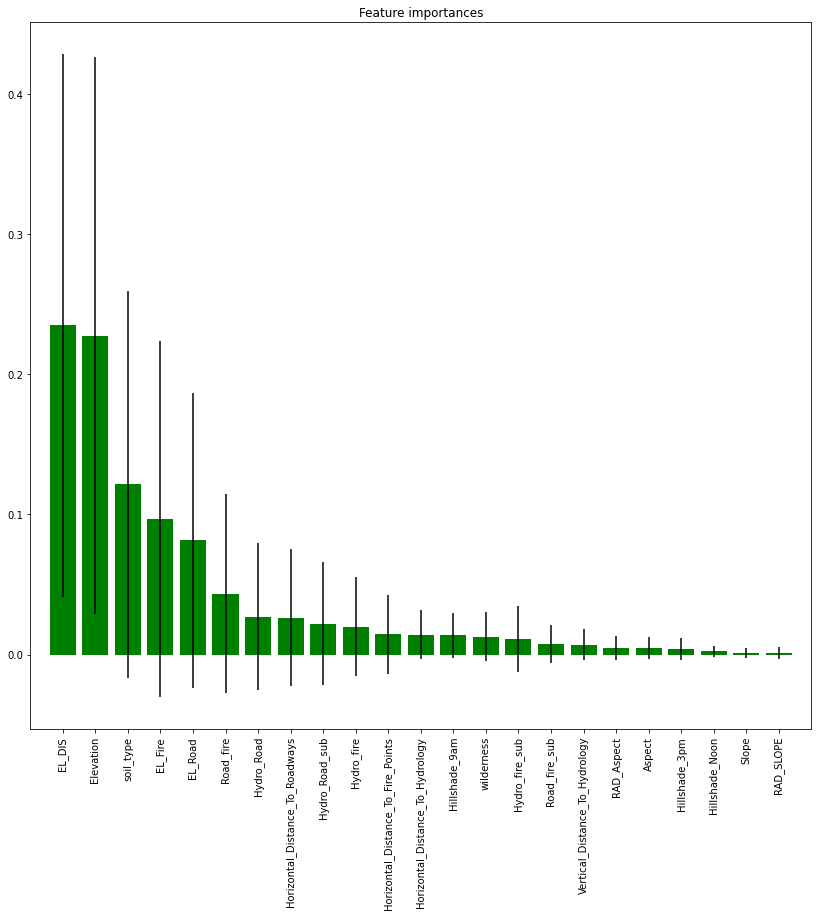

In [50]:
FS.Feature_visualizer(dftrain)

# Dropping Features After Feature Selection

In [54]:
col_list = ['Elevation','EL_DIS','Road_fire','EL_Fire','soil_type','EL_Road','Horizontal_Distance_To_Roadways','Cover_Type']
col_list1 = ['Elevation','EL_DIS','Road_fire','EL_Fire','soil_type','EL_Road','Horizontal_Distance_To_Roadways']
class Column_Dopper_After_Feature_Selction():

    
    def __init__(self):
        print("Column Dopper object created")
    
    
    def dropper(self,x):
        
        """
        This method helps
        to drop the columns
        in our original 
        dataframe which is 
        available in the 
        col_list and return 
        us final dataset
        """
        
        data=[]
        for i in x.columns:
            if i in col_list:
                data.append(i)
        return x[data]


In [55]:
FS = Column_Dopper_After_Feature_Selction()

Column Dopper object created


In [53]:
New_dftrain = FS.dropper(dftrain)
New_dftrain.head()

,Elevation,Horizontal_Distance_To_Roadways,Cover_Type,soil_type,Road_fire,EL_DIS,EL_Fire,EL_Road
0,2596.0,510.0,5.0,29.0,6789.0,2544.4,1340.2,2494.0
1,2590.0,390.0,5.0,29.0,6615.0,2547.6,1345.0,2512.0
2,2804.0,3180.0,2.0,12.0,9301.0,2750.4,1579.8,2168.0
3,2785.0,3090.0,2.0,30.0,9301.0,2736.6,1542.8,2167.0
4,2595.0,391.0,5.0,29.0,6563.0,2564.4,1360.6,2516.8


In [56]:
New_dftest = FS.dropper(dftest)
New_dftest.head()

,Elevation,Horizontal_Distance_To_Roadways,soil_type,Road_fire,EL_DIS,EL_Fire,EL_Road
0,2680,2684,29,9329,2680.0,1351.0,2143.2
1,2683,2654,29,9329,2683.0,1348.0,2152.2
2,2713,2980,29,9324,2713.0,1444.2,2117.0
3,2709,2950,29,9324,2709.0,1434.2,2119.0
4,2706,2920,29,9324,2706.0,1425.2,2122.0


## Prediction for Original Test Data

In [82]:
import joblib
x1 = New_dftrain.drop(['Cover_Type'],axis=1)
y1 = New_dftrain['Cover_Type']
x_train1,x_test1,y_train1,y_test1=train_test_split(x1\
                ,y1,test_size=0.30,random_state=42)


class Original_Test_Data_Prediction():

    def __init__(self,n_estimators,
                    max_depth,
                    min_samples_split,
                    min_samples_leaf,
                    max_leaf_nodes,
                    bootstrap,
                    class_weight,
                    random_state,
                    criterion):
        
        self.n_estimators = 250
        self.max_depth = 5
        self.min_samples_split = 3
        self.min_samples_leaf = 3
        self.max_leaf_nodes = None
        self.bootstrap = True
        self.class_weight = 'balanced'
        self.random_state = 29 
        self.criterion = 'gini'
        
        
        print("Prediction object created")
        
        
    def Random_Forest_Model(self,data):
        
        RF_Selector = RandomForestClassifier(n_estimators = self.n_estimators,
                    max_depth = self.max_depth,
                    min_samples_split = self.min_samples_split,
                    min_samples_leaf = self.min_samples_leaf,
                    max_leaf_nodes = self.max_leaf_nodes,
                    bootstrap = self.bootstrap,
                    class_weight= self.class_weight,
                    criterion = self.criterion)
        RF_Selector = RF_Selector.fit(x_train1,y_train1)
        rf_pred = RF_Selector.predict(New_dftest)
        print(rf_pred)
        return RF_Selector
        
    def Dump_Model(self,object,modelname):
        return joblib.dump(RF_Selector,  'RF_Modeljob.pkl',compress=3)
    
    def Load_Model(self,modelname):
        return joblib.load('RF_Modeljob.pkl')

In [83]:
modelpredictor = Original_Test_Data_Prediction(250,5,3,3,None,True,'balanced',29,'gini')

Prediction object created


In [84]:
RF_Selector = modelpredictor.Random_Forest_Model(New_dftrain)
RF_Selector

[2. 2. 2. ... 3. 3. 3.]


RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=3,
                       min_samples_split=3, n_estimators=250)

## Serializing Model

In [85]:
RF_Selector = modelpredictor.Dump_Model(RF_Selector,'RF_Modeljob.pkl')
RF_Selector

['RF_Modeljob.pkl']

In [86]:
RF_Selector = modelpredictor.Load_Model('RF_Modeljob.pkl')
RF_Selector

RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=3,
                       min_samples_split=3, n_estimators=250)